# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [2]:
import pandas as pd

train = pd.read_csv('Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


#### Replace missing values in the dataset by the mean

In [3]:
train = train.fillna(train.mean())

In [4]:
train.info()
train['Salary'] = pd.to_numeric(train.Salary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       322 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


#### Graph a scatter plot to visualize the relationship between Hits and Salary

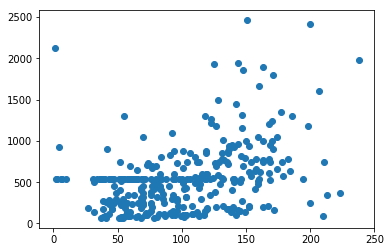

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#TODO
plt.scatter(train.Hits, train.Salary)

#### Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# TODO: Split the data into 70/30 train/test datasets
X_train, X_test, y_train, y_test = train_test_split(train.Hits.values, train.Salary.values, test_size=.3)

# TODO: Fit linear regression model
lm = LinearRegression()
lm.fit(X_train.reshape(-1, 1), y_train)

# TODO: print the slope and intercept
print('slope:', lm.coef_)
print('intercept:', lm.intercept_)

slope: [3.91980729]
intercept: 137.03601846352115


#### Compute the RMSE of the model obtained above

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = lm.predict(X_test.reshape(-1, 1))
print('rmse:', sqrt(mean_squared_error(y_predicted, y_test)))

rmse: 412.39595659672506


#### Graph the linear regression model obtained on the data

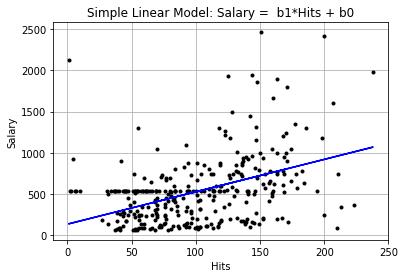

In [8]:
# TODO: Plot outputs
plt.plot()

slope = lm.coef_
intercept = lm.intercept_

Fx = lambda x: x*slope+intercept

#PLOT
fig1 = plt.figure(1, figsize=(14, 8))
#Plot Data-model
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(train.Hits,train.Salary,'.k') #data
plt.plot(train.Hits,Fx(train.Hits),'-b') #model
plt.title("Simple Linear Model: Salary =  b1*Hits + b0")
plt.ylabel('Salary')
plt.xlabel('Hits')
plt.grid()

#### Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.

rmse: 395.44480884886957


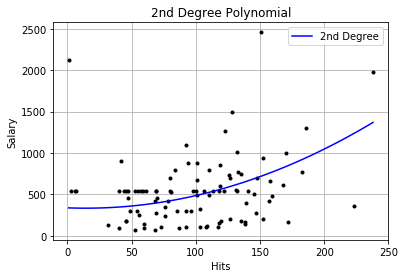

In [36]:
import numpy as np

# Generate weights for polynomial function with degree 2
weights = np.polyfit(X_train, y_train, 2)

# Generate model with the given weights
poly_model = np.poly1d(weights)

# Prediction on test set
pred = poly_model(X_test)

# TODO: Compute the RMSE
print('rmse:', sqrt(mean_squared_error(pred, y_test)))
# TODO: Plot the visualisation
poly_regr = np.linspace(X_test.min(), X_test.max())
plot_values = poly_model(poly_regr)
plt.plot(X_test, y_test, '.k')
plt.plot(poly_regr, plot_values, '-b', label='2nd Degree')
plt.ylabel('Salary')
plt.xlabel('Hits')
plt.title("2nd Degree Polynomial")
plt.legend()
plt.grid()

####  Create a cubic spline with 3 knots at 40, 100 and 150


rmse: 388.74549932437327


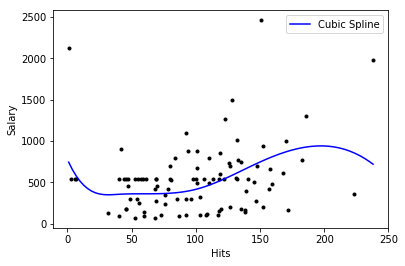

In [41]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate a cubic spline with 3 knots at 40, 100 and 150
transformed_x = dmatrix("bs(train, knots=(40, 100, 150), degree=3, include_intercept=False)", {"train":X_train}, return_type='dataframe')

# Fit a generalized linear models on the transformed dataset
fit_glm = sm.GLM(y_train, transformed_x).fit()

# Prediction
pred_glm = fit_glm.predict(dmatrix("bs(train, knots=(40, 100, 150), degree=3, include_intercept=False)", {"train":X_test}, return_type='dataframe'))

# TODO: Compute the RMSE 
print('rmse:', sqrt(mean_squared_error(pred_glm, y_test)))

# TODO: Plot the visualisation
xp = np.linspace(X_test.min(),X_test.max(),80)

# Make some predictions
pred2 = fit_glm.predict(dmatrix("bs(xp, knots=(40, 100, 150), include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.plot(X_test, y_test, '.k')
plt.plot(xp, pred2, color='b', label='Cubic Spline')
plt.legend()
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()

#### Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'

395.48407357611194


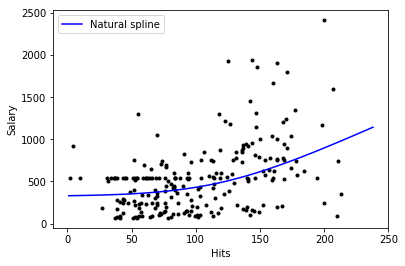

In [34]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')
fit3 = sm.GLM(y_train, transformed_x3).fit()

# Prediction
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": X_test}, return_type='dataframe'))

# TODO: Compute the RMSE 
rms = sqrt(mean_squared_error(y_test, pred3))
print(rms)

# TODO: Plot the visualisation
xp = np.linspace(X_test.min(),X_test.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.plot(X_train, y_train, '.k')
plt.plot(xp, pred3,color='b', label='Natural spline')
plt.legend()
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()

#### Which model performed the best?

Cubic Spline had the lowest RMSE = 388, but 2nd Degree plynomial looked less overfit from visual inspection and both had very similar performance RMSE = 395.